<a href="https://colab.research.google.com/github/Anushree-15-lab/Tech_Seminar_7A/blob/main/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

cnames = {
'aliceblue': '#F0F8FF',
'antiquewhite': '#FAEBD7',
'aqua': '#00FFFF',
'aquamarine': '#7FFFD4',
'azure': '#F0FFFF',
'bisque': '#FFE4C4',
'black': '#000000',
'blanchedalmond': '#FFEBCD',
'blue': '#0000FF',
'blueviolet': '#8A2BE2',
'brown': '#A52A2A',
'burlywood': '#DEB887',
'cadetblue': '#5F9EA0',
'chartreuse': '#7FFF00',
'chocolate': '#D2691E',
'coral': '#FF7F50',
'cornflowerblue': '#6495ED',
'cornsilk': '#FFF8DC',
'crimson': '#DC143C',
'cyan': '#00FFFF',
'darkblue': '#00008B',
'darkcyan': '#008B8B',
'darkgoldenrod': '#B8860B',
'darkgray': '#A9A9A9',
'darkgreen': '#006400',
'darkkhaki': '#BDB76B',
'darkmagenta': '#8B008B',
'darkolivegreen': '#556B2F',
'darkorange': '#FF8C00',
'darkorchid': '#9932CC',
'darkred': '#8B0000',
'darksalmon': '#E9967A',
'darkseagreen': '#8FBC8F',
'darkslateblue': '#483D8B',
'darkslategray': '#2F4F4F',
'darkturquoise': '#00CED1',
'darkviolet': '#9400D3',
'deeppink': '#FF1493',
'deepskyblue': '#00BFFF',
'dimgray': '#696969',
'dodgerblue': '#1E90FF',
'firebrick': '#B22222',
'floralwhite': '#FFFAF0',
'forestgreen': '#228B22',
'fuchsia': '#FF00FF',
'gainsboro': '#DCDCDC',
'ghostwhite': '#F8F8FF',
'gold': '#FFD700',
'goldenrod': '#DAA520',
'gray': '#808080',
'green': '#008000',
'greenyellow': '#ADFF2F',
'honeydew': '#F0FFF0',
'hotpink': '#FF69B4',
'indianred': '#CD5C5C',
'indigo': '#4B0082',
'ivory': '#FFFFF0',
'khaki': '#F0E68C',
'lavender': '#E6E6FA',
'lavenderblush': '#FFF0F5',
'lawngreen': '#7CFC00',
'lemonchiffon': '#FFFACD',
'lightblue': '#ADD8E6',
'lightcoral': '#F08080',
'lightcyan': '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen': '#90EE90',
'lightgray': '#D3D3D3',
'lightpink': '#FFB6C1',
'lightsalmon': '#FFA07A',
'lightseagreen': '#20B2AA',
'lightskyblue': '#87CEFA',
'lightslategray': '#778899',
'lightsteelblue': '#B0C4DE',
'lightyellow': '#FFFFE0',
'lime': '#00FF00',
'limegreen': '#32CD32',
'linen': '#FAF0E6',
'magenta': '#FF00FF',
'maroon': '#800000',
'mediumaquamarine': '#66CDAA',
'mediumblue': '#0000CD',
'mediumorchid': '#BA55D3',
'mediumpurple': '#9370DB',
'mediumseagreen': '#3CB371',
'mediumslateblue': '#7B68EE',
'mediumspringgreen': '#00FA9A',
'mediumturquoise': '#48D1CC',
'mediumvioletred': '#C71585',
'midnightblue': '#191970',
'mintcream': '#F5FFFA',
'mistyrose': '#FFE4E1',
'moccasin': '#FFE4B5',
'navajowhite': '#FFDEAD',
'navy': '#000080',
'oldlace': '#FDF5E6',
'olive': '#808000',
'olivedrab': '#6B8E23',
'orange': '#FFA500',
'orangered': '#FF4500',
'orchid': '#DA70D6',
'palegoldenrod': '#EEE8AA',
'palegreen': '#98FB98',
'paleturquoise': '#AFEEEE',
'palevioletred': '#DB7093',
'papayawhip': '#FFEFD5',
'peachpuff': '#FFDAB9',
'peru': '#CD853F',
'pink': '#FFC0CB',
'plum': '#DDA0DD',
'powderblue': '#B0E0E6',
'purple': '#800080',
'red': '#FF0000',
'rosybrown': '#BC8F8F',
'royalblue': '#4169E1',
'saddlebrown': '#8B4513',
'salmon': '#FA8072',
'sandybrown': '#FAA460',
'seagreen': '#2E8B57',
'seashell': '#FFF5EE',
'sienna': '#A0522D',
'silver': '#C0C0C0',
'skyblue': '#87CEEB',
'slateblue': '#6A5ACD',
'slategray': '#708090',
'snow': '#FFFAFA',
'springgreen': '#00FF7F',
'steelblue': '#4682B4',
'tan': '#D2B48C',
'teal': '#008080',
'thistle': '#D8BFD8',
'tomato': '#FF6347',
'turquoise': '#40E0D0',
'violet': '#EE82EE',
'wheat': '#F5DEB3',
'white': '#FFFFFF',
'whitesmoke': '#F5F5F5',
'yellow': '#FFFF00',
'yellowgreen': '#9ACD32'}

colors = list(cnames.keys())

In [2]:
data=  pd.read_csv("/content/students_adaptability_level_online_education.csv")
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [3]:
data.replace("Boy","Male",inplace=True)
data.replace("Girl","Female",inplace=True)
data.replace("Mid","Middle",inplace=True)
data.replace("Poor","Lower",inplace=True)
data.replace("Rich","Upper",inplace=True)
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle,Wifi,4G,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle,Wifi,4G,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,16-20,College,Non Government,No,Yes,Low,Middle,Wifi,4G,1-3,No,Mobile,Low
1201,Female,16-20,College,Non Government,No,No,High,Middle,Wifi,4G,3-6,No,Mobile,Moderate
1202,Male,11-15,School,Non Government,No,Yes,Low,Middle,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Female,16-20,College,Non Government,No,No,Low,Middle,Wifi,4G,1-3,No,Mobile,Low


In [4]:
enc = LabelEncoder()
data.Gender = enc.fit_transform(data.Gender)
data["Education Level"] = enc.fit_transform(data["Education Level"])
data["Institution Type"] = enc.fit_transform(data["Institution Type"])
data["IT Student"] = enc.fit_transform(data["IT Student"])
data["Location"] = enc.fit_transform(data["Location"])
data["Load-shedding"] = enc.fit_transform(data["Load-shedding"])
data["Financial Condition"] = enc.fit_transform(data["Financial Condition"])
data["Internet Type"] = enc.fit_transform(data["Internet Type"])
data["Network Type"] = enc.fit_transform(data["Network Type"])
data["Class Duration"] = enc.fit_transform(data["Class Duration"])
data["Self Lms"] = enc.fit_transform(data["Self Lms"])
data["Device"] = enc.fit_transform(data["Device"])
data["Adaptivity Level"] = enc.fit_transform(data["Adaptivity Level"])
data["Age"] = enc.fit_transform(data["Age"])

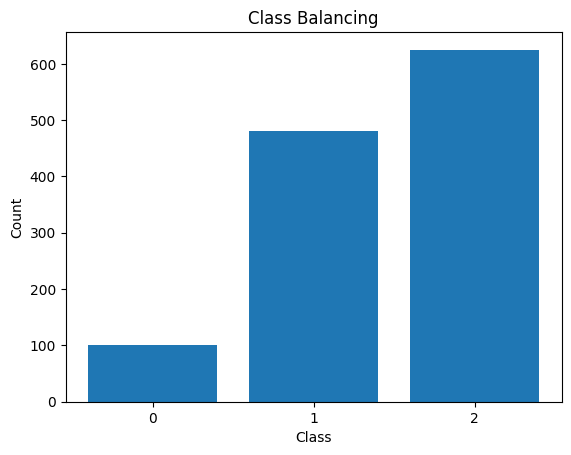

In [5]:
un, counts = np.unique(data["Adaptivity Level"],return_counts=True)
plt.bar([str(i) for i in un], counts)
plt.title("Class Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [6]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(data.drop(["Adaptivity Level"],axis=1),data["Adaptivity Level"])

In [7]:

X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    labels,
                                                    test_size = 0.2,
                                                    shuffle=True)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train),Y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(model.predict(X_test),Y_test)*100))
print("Precision      : {:.2f} %".format(precision_score(model.predict(X_test),Y_test,average='micro')*100))
print("Recall         : {:.2f} %".format(recall_score(model.predict(X_test),Y_test,average='micro')*100))

Train Accuracy : 93.00 %
Test Accuracy  : 93.60 %
Precision      : 93.60 %
Recall         : 93.60 %
